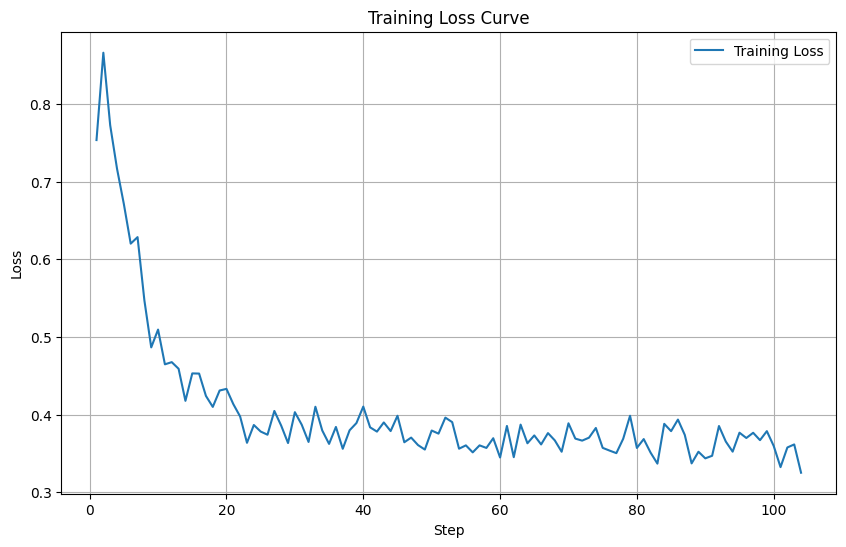

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = {'Step': range(1, 105),
        'Training Loss': [0.753400, 0.865800, 0.772500, 0.716500, 0.671000, 0.620100, 0.628500, 0.547100, 0.486600, 0.509500, 0.464800, 0.467600, 0.459100, 0.417800, 0.453100, 0.452900, 0.424100, 0.410000, 0.431100, 0.433200, 0.413600, 0.397600, 0.363800, 0.386700, 0.378300, 0.374200, 0.404800, 0.385900, 0.363500, 0.403200, 0.387100, 0.364900, 0.410200, 0.379700, 0.362400, 0.384200, 0.356100, 0.379900, 0.389200, 0.410400, 0.383700, 0.378200, 0.390000, 0.378900, 0.398600, 0.364500, 0.370500, 0.360900, 0.355100, 0.379600, 0.375600, 0.396200, 0.390400, 0.356200, 0.360500, 0.351500, 0.360500, 0.357200, 0.369700, 0.344900, 0.385500, 0.345300, 0.387200, 0.363200, 0.373300, 0.361700, 0.376300, 0.366900, 0.352300, 0.388900, 0.369200, 0.366600, 0.370400, 0.382900, 0.357300, 0.353800, 0.350500, 0.369000, 0.398600, 0.357200, 0.368600, 0.351200, 0.337000, 0.388200, 0.378800, 0.393700, 0.374000, 0.337300, 0.352300, 0.343800, 0.347100, 0.385400, 0.365400, 0.352400, 0.376800, 0.370000, 0.376700, 0.367200, 0.378800, 0.359800, 0.332500, 0.357800, 0.361700, 0.325300]}

df = pd.DataFrame(data)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(df['Step'], df['Training Loss'], label='Training Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
df.to_csv('training_loss.csv', index=False)

In [ ]:
from datasets import load_dataset

ds = load_dataset("zeref713/gsm8k_phi3_responses")

In [32]:
ds

DatasetDict({
    test: Dataset({
        features: ['question', 'ground_truth_answer', 'finetuned_phi3_responses', 'phi3_not_finetuned_responses'],
        num_rows: 1319
    })
})

In [ ]:
%pip install datasets evaluate rouge_score sacrebleu

In [34]:
from datasets import load_dataset
import evaluate

# Load your dataset
ds = load_dataset("zeref713/gsm8k_phi3_responses")

# Load ROUGE metric
rouge = evaluate.load('rouge')

# Prepare the dataset
references = ds['test']['ground_truth_answer']
finetuned_predictions = ds['test']['finetuned_phi3_responses']
not_finetuned_predictions = ds['test']['phi3_not_finetuned_responses']

# Define a function to compute ROUGE metrics
def compute_rouge(predictions, references):
    results = rouge.compute(predictions=predictions, references=references)
    print("ROUGE-1: {:.4f}".format(results['rouge1']))
    print("ROUGE-2: {:.4f}".format(results['rouge2']))
    print("ROUGE-L: {:.4f}".format(results['rougeL']))
    print(results)
    # return results

# Compute ROUGE metrics for fine-tuned responses
print("Metrics for Fine-tuned PHI-3 Responses (ROUGE):")
compute_rouge(finetuned_predictions, references)

# Compute ROUGE metrics for not fine-tuned responses
print("\nMetrics for Not Fine-tuned PHI-3 Responses (ROUGE):")
compute_rouge(not_finetuned_predictions, references)


Metrics for Fine-tuned PHI-3 Responses (ROUGE):
ROUGE-1: 0.6252
ROUGE-2: 0.3973
ROUGE-L: 0.5235
{'rouge1': 0.6252269772481507, 'rouge2': 0.3972974877673836, 'rougeL': 0.5234702173625023, 'rougeLsum': 0.5904686891418267}

Metrics for Not Fine-tuned PHI-3 Responses (ROUGE):
ROUGE-1: 0.4909
ROUGE-2: 0.2497
ROUGE-L: 0.3754
{'rouge1': 0.49091467341437633, 'rouge2': 0.24966779074944134, 'rougeL': 0.3754413604706843, 'rougeLsum': 0.45185096882052767}


In [ ]:
from datasets import load_dataset
from nltk.translate.bleu_score import sentence_bleu
import nltk

# Download necessary NLTK data
nltk.download('punkt')

# Load the dataset
ds = load_dataset("zeref713/gsm8k_phi3_responses")

# Extract the test set
test_dataset = ds['test']

# Calculate BLEU scores for finetuned and non-finetuned responses
finetuned_bleu_scores = []
non_finetuned_bleu_scores = []

for i in range(len(test_dataset)):
    reference = [test_dataset[i]['ground_truth_answer'].split()]  # Tokenize the reference answer
    
    # Finetuned responses
    finetuned_candidate = test_dataset[i]['finetuned_phi3_responses'].split()
    finetuned_bleu_score = sentence_bleu(reference, finetuned_candidate)
    finetuned_bleu_scores.append(finetuned_bleu_score)
    
    # Non-finetuned responses
    non_finetuned_candidate = test_dataset[i]['phi3_not_finetuned_responses'].split()
    non_finetuned_bleu_score = sentence_bleu(reference, non_finetuned_candidate)
    non_finetuned_bleu_scores.append(non_finetuned_bleu_score)

# Calculate the average BLEU scores
average_finetuned_bleu = sum(finetuned_bleu_scores) / len(finetuned_bleu_scores)
average_non_finetuned_bleu = sum(non_finetuned_bleu_scores) / len(non_finetuned_bleu_scores)

# print(f"Average BLEU score for finetuned responses: {average_finetuned_bleu:.4f}")
# print(f"Average BLEU score for non-finetuned responses: {average_non_finetuned_bleu:.4f}")

In [35]:
print(f"Average BLEU score for finetuned responses: {average_finetuned_bleu:.4f}")
print(f"Average BLEU score for non-finetuned responses: {average_non_finetuned_bleu:.4f}")

Average BLEU score for finetuned responses: 0.1322
Average BLEU score for non-finetuned responses: 0.0848


In [1]:
import pandas as pd

# Define the data for the metrics
data = {
    "Metric": [
        "Average WMD",
        "Average Cosine Similarity (TfidfVectorizer)",
        "Average Cosine Similarity (Word2Vec)",
        "Average Cosine Similarity (sentence_transformers all-MiniLM-L6-v2)",
        "Average Cosine Similarity (Universal Sentence Encoder)",
        "Average BLEU Score",
        "ROUGE-1 (Fine-tuned)",
        "ROUGE-2 (Fine-tuned)",
        "ROUGE-L (Fine-tuned)",
        "ROUGE-Lsum (Fine-tuned)",
        "ROUGE-1 (Non-Fine-tuned)",
        "ROUGE-2 (Non-Fine-tuned)",
        "ROUGE-L (Non-Fine-tuned)",
        "ROUGE-Lsum (Non-Fine-tuned)",
    ],
    "Fine-tuned": [
        0.4235,
        0.7274,
        0.9267,
        0.8780,
        0.7150,
        0.1322,
        0.6252,
        0.3966,
        0.5239,
        0.5906,
        None,
        None,
        None,
        None
    ],
    "Non-Fine-tuned": [
        0.6370,
        0.6648,
        0.8000,
        0.8417,
        0.7214,
        0.0848,
        0.4909,
        0.2496,
        0.3756,
        0.4518,
        0.4909,
        0.2496,
        0.3756,
        0.4518,
    ]
}

# Create a DataFrame
metrics_df = pd.DataFrame(data)

# Display the table
print(metrics_df.to_string(index=False))


                                                            Metric  Fine-tuned  Non-Fine-tuned
                                                       Average WMD      0.4235          0.6370
                       Average Cosine Similarity (TfidfVectorizer)      0.7274          0.6648
                              Average Cosine Similarity (Word2Vec)      0.9267          0.8000
Average Cosine Similarity (sentence_transformers all-MiniLM-L6-v2)      0.8780          0.8417
            Average Cosine Similarity (Universal Sentence Encoder)      0.7150          0.7214
                                                Average BLEU Score      0.1322          0.0848
                                              ROUGE-1 (Fine-tuned)      0.6252          0.4909
                                              ROUGE-2 (Fine-tuned)      0.3966          0.2496
                                              ROUGE-L (Fine-tuned)      0.5239          0.3756
                                           ROUGE-L

In [2]:
import pandas as pd
from tabulate import tabulate

# Data for the table
data = {
    "Metric": [
        "Average WMD",
        "Average WMD",
        "Average Cosine Similarity (TfidfVectorizer)",
        "Average Cosine Similarity (TfidfVectorizer)",
        "Average Cosine Similarity (Word2Vec)",
        "Average Cosine Similarity (Word2Vec)",
        "Average Cosine Similarity (sentence_transformers all-MiniLM-L6-v2)",
        "Average Cosine Similarity (sentence_transformers all-MiniLM-L6-v2)",
        "Average Cosine Similarity (Universal Sentence Encoder)",
        "Average Cosine Similarity (Universal Sentence Encoder)",
        "Average BLEU score",
        "Average BLEU score",
        "ROUGE-1",
        "ROUGE-1",
        "ROUGE-2",
        "ROUGE-2",
        "ROUGE-L",
        "ROUGE-L",
        "ROUGE-Lsum",
        "ROUGE-Lsum",
    ],
    "Type": [
        "Finetuned", "Non-Finetuned",
        "Finetuned", "Non-Finetuned",
        "Finetuned", "Non-Finetuned",
        "Finetuned", "Non-Finetuned",
        "Finetuned", "Non-Finetuned",
        "Finetuned", "Non-Finetuned",
        "Finetuned", "Non-Finetuned",
        "Finetuned", "Non-Finetuned",
        "Finetuned", "Non-Finetuned",
        "Finetuned", "Non-Finetuned"
    ],
    "Value": [
        0.4235, 0.6370,
        0.7274, 0.6648,
        0.9267, 0.8000,
        0.8780, 0.8417,
        0.7150, 0.7214,
        0.1322, 0.0848,
        0.6252, 0.4909,
        0.3966, 0.2496,
        0.5239, 0.3756,
        0.5906, 0.4518
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the table
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════════════════════════════════════════════════════════════╤═══════════════╤═════════╕
│    │ Metric                                                             │ Type          │   Value │
╞════╪════════════════════════════════════════════════════════════════════╪═══════════════╪═════════╡
│  0 │ Average WMD                                                        │ Finetuned     │  0.4235 │
├────┼────────────────────────────────────────────────────────────────────┼───────────────┼─────────┤
│  1 │ Average WMD                                                        │ Non-Finetuned │  0.637  │
├────┼────────────────────────────────────────────────────────────────────┼───────────────┼─────────┤
│  2 │ Average Cosine Similarity (TfidfVectorizer)                        │ Finetuned     │  0.7274 │
├────┼────────────────────────────────────────────────────────────────────┼───────────────┼─────────┤
│  3 │ Average Cosine Similarity (TfidfVectorizer)                        │ Non-Fi

In [1]:
import pandas as pd
from tabulate import tabulate

# Data for the table
data = {
    "Metric": [
        "Accuracy",
        "WMD",
        "Cosine Similarity (TfidfVectorizer)",
        "Cosine Similarity (Word2Vec)",
        "Cosine Similarity (sentence_transformers all-MiniLM-L6-v2)",
        "Cosine Similarity (Universal Sentence Encoder)",
        "BLEU score",
        "ROUGE-1",
        "ROUGE-2",
        "ROUGE-L",
        "ROUGE-Lsum",
    ],
    "Finetuned": [
        "0.741 (After 1 epoch, 0-shot)",
        0.4235,
        0.7274,
        0.9267,
        0.8780,
        0.7150,
        0.1322,
        0.6252,
        0.3966,
        0.5239,
        0.5906
    ],
    "Non-Finetuned": [
        "0.818 (0 shot)",
        0.6370,
        0.6648,
        0.8000,
        0.8417,
        0.7214,
        0.0848,
        0.4909,
        0.2496,
        0.3756,
        0.4518
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the table
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════════════════════════════════════════════════════╤═══════════════════════════════╤═════════════════╕
│    │ Metric                                                     │ Finetuned                     │ Non-Finetuned   │
╞════╪════════════════════════════════════════════════════════════╪═══════════════════════════════╪═════════════════╡
│  0 │ Accuracy                                                   │ 0.741 (After 1 epoch, 0-shot) │ 0.818 (0 shot)  │
├────┼────────────────────────────────────────────────────────────┼───────────────────────────────┼─────────────────┤
│  1 │ WMD                                                        │ 0.4235                        │ 0.637           │
├────┼────────────────────────────────────────────────────────────┼───────────────────────────────┼─────────────────┤
│  2 │ Cosine Similarity (TfidfVectorizer)                        │ 0.7274                        │ 0.6648          │
├────┼──────────────────────────────────────────────────

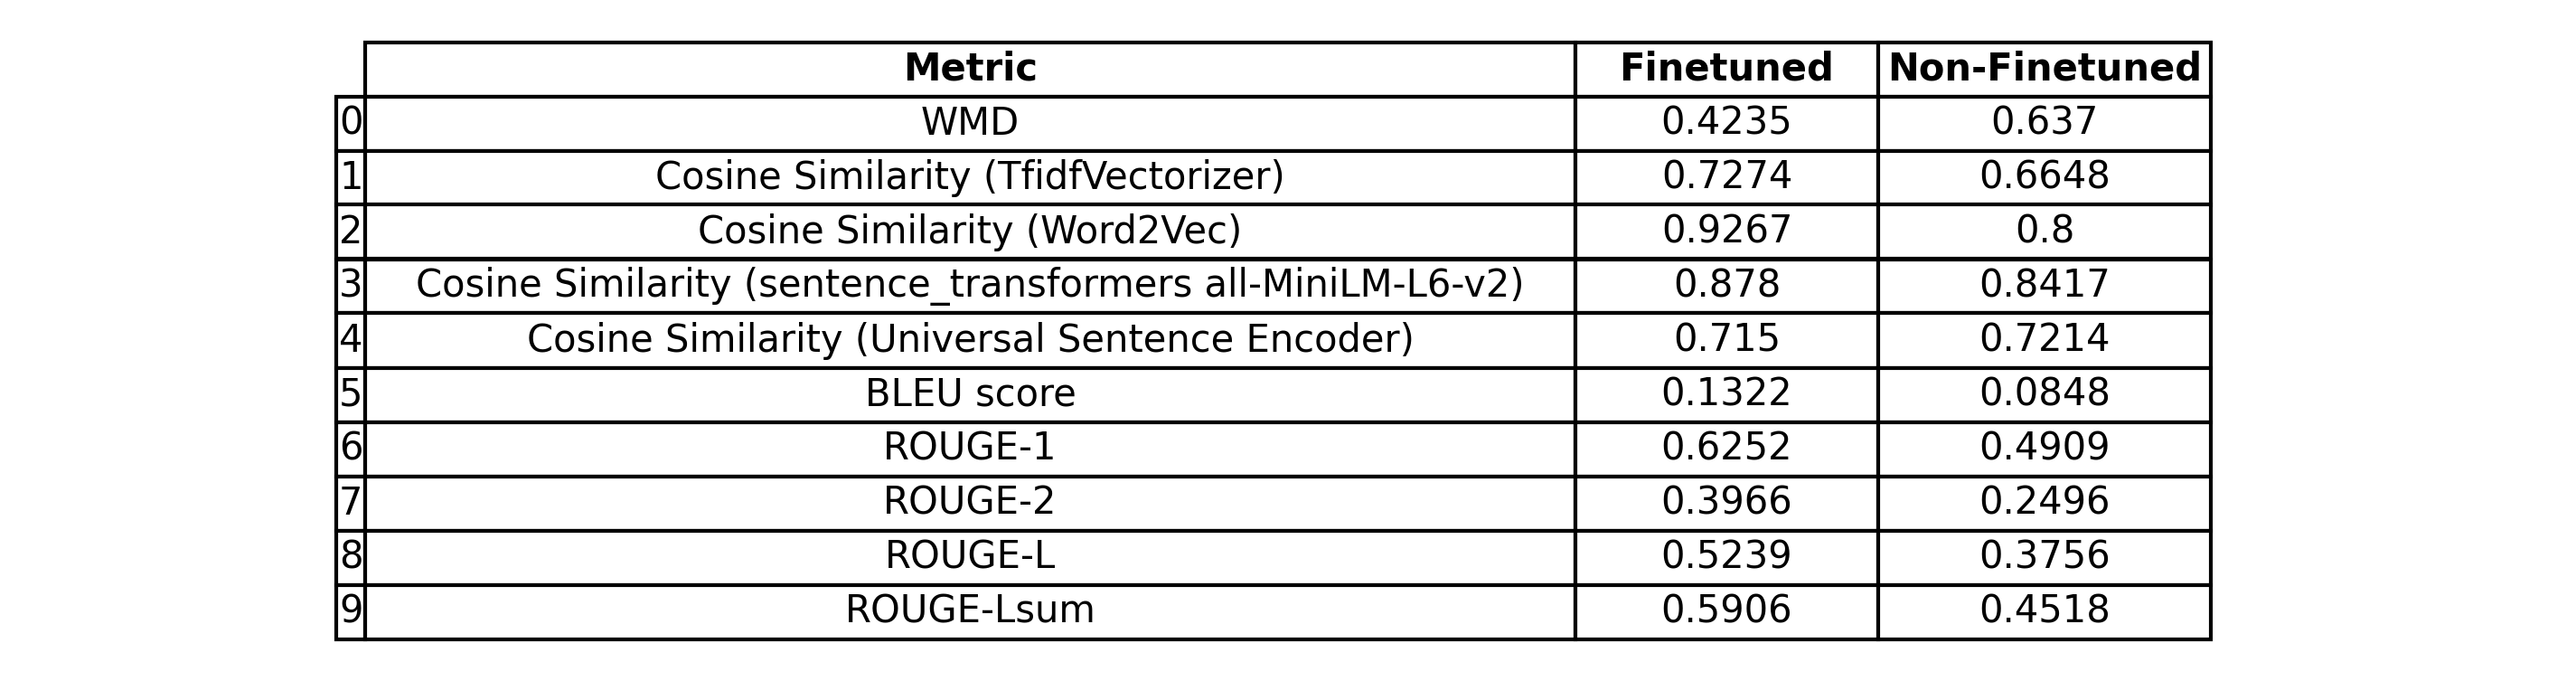

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import table
from PIL import Image
from IPython.display import display

# Data for the table
data = {
    "Metric": [
        "WMD",
        "Cosine Similarity (TfidfVectorizer)",
        "Cosine Similarity (Word2Vec)",
        "Cosine Similarity (sentence_transformers all-MiniLM-L6-v2)",
        "Cosine Similarity (Universal Sentence Encoder)",
        "BLEU score",
        "ROUGE-1",
        "ROUGE-2",
        "ROUGE-L",
        "ROUGE-Lsum",
    ],
    "Finetuned": [
        0.4235,
        0.7274,
        0.9267,
        0.8780,
        0.7150,
        0.1322,
        0.6252,
        0.3966,
        0.5239,
        0.5906
    ],
    "Non-Finetuned": [
        0.6370,
        0.6648,
        0.8000,
        0.8417,
        0.7214,
        0.0848,
        0.4909,
        0.2496,
        0.3756,
        0.4518
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(12, 3))  # Define figure size
ax.axis('off')  # Hide axes

tbl = table(ax, df, loc='center', cellLoc='center', colWidths=[0.4, 0.1, 0.11])
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

# Make the headers bold
for key, cell in tbl.get_celld().items():
    if key[0] == 0:  # Header row
        cell.set_text_props(fontweight='bold')

# Save the table as an image
plt.savefig('metrics_table.png', bbox_inches='tight', dpi=300)
plt.close(fig)

# Display the image in Colab
img = Image.open('metrics_table.png')
display(img)

In [2]:
import pandas as pd
from tabulate import tabulate

# Data for the table
data = {
    "Metric": [
        "Accuracy",
        "Word Mover's Distance (WMD)",
        "Cosine Similarity",
        "BLEU score",
        "ROUGE-1",
        "ROUGE-2",
        "ROUGE-L",
        "ROUGE-Lsum",
    ],
    "Finetuned": [
        "0.741 (After 1 epoch, 0-shot)",
        0.4235,
        0.9267,
        0.1322,
        0.6252,
        0.3966,
        0.5239,
        0.5906
    ],
    "Non-Finetuned": [
        "0.818 (0 shot)",
        0.6370,
        0.8000,
        0.0848,
        0.4909,
        0.2496,
        0.3756,
        0.4518
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the table
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))


╒════╤═════════════════════════════╤═══════════════════════════════╤═════════════════╕
│    │ Metric                      │ Finetuned                     │ Non-Finetuned   │
╞════╪═════════════════════════════╪═══════════════════════════════╪═════════════════╡
│  0 │ Accuracy                    │ 0.741 (After 1 epoch, 0-shot) │ 0.818 (0 shot)  │
├────┼─────────────────────────────┼───────────────────────────────┼─────────────────┤
│  1 │ Word Mover's Distance (WMD) │ 0.4235                        │ 0.637           │
├────┼─────────────────────────────┼───────────────────────────────┼─────────────────┤
│  2 │ Cosine Similarity           │ 0.9267                        │ 0.8             │
├────┼─────────────────────────────┼───────────────────────────────┼─────────────────┤
│  3 │ BLEU score                  │ 0.1322                        │ 0.0848          │
├────┼─────────────────────────────┼───────────────────────────────┼─────────────────┤
│  4 │ ROUGE-1                     │ 0.6252

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the hyperparameters and their values for both models
data = {
    "Hyperparameter": [
        "Optimizer",
        "r",
        "lora_alpha",
        "Learning Rate",
        "Number of Train Epochs"
    ],
    "Model 1 Value": [
        "adamw_8bit",
        16,
        16,
        "2e-4",
        1
    ],
    "Model 2 Value": [
        "adamw_8bit",
        16,
        16,
        "2e-4",
        1
    ]
}

# Create a DataFrame
hyperparameter_table = pd.DataFrame(data)

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 4))  # Set the size of the figure

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=hyperparameter_table.values,
                 colLabels=hyperparameter_table.columns,
                 cellLoc='center', 
                 loc='center')

# Save the table as an image
plt.savefig("hyperparameter_table.png", bbox_inches='tight', dpi=300)
plt.close()  # Close the figure

In [4]:
import pandas as pd
from tabulate import tabulate

# Define the hyperparameters and their values for both models
data = {
    "Hyperparameter": [
        "Learning Rate",
        "r",
        "lora_alpha",
        "Optimizer",
        "lr_scheduler_type",
        "weight_decay",
        "Number of Train Epochs"
    ],
    "Values": [
        "2e-4",
        16,
        16,
        "adamw_8bit",
        "linear",
        0.01,
        1
    ],
    # "Model 2 Value": [
    #     "adamw_8bit",
    #     16,
    #     16,
    #     "2e-4",
    #     1
    # ]
}

# Create a DataFrame
hyperparameter_table = pd.DataFrame(data)

# Print the table in a beautiful format
print(tabulate(hyperparameter_table, headers='keys', tablefmt='pretty'))


+---+------------------------+------------+
|   |     Hyperparameter     |   Values   |
+---+------------------------+------------+
| 0 |     Learning Rate      |    2e-4    |
| 1 |           r            |     16     |
| 2 |       lora_alpha       |     16     |
| 3 |       Optimizer        | adamw_8bit |
| 4 |   lr_scheduler_type    |   linear   |
| 5 |      weight_decay      |    0.01    |
| 6 | Number of Train Epochs |     1      |
+---+------------------------+------------+
